<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
df = pd.read_csv('./data/job_listings.csv')

In [3]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
df['description'] = [BeautifulSoup(x).get_text()
                     .replace('\\n', '').replace("b'", '')
                     .replace('b"', '') for x in df['description']]

In [5]:
df['description'].head()

0    Job Requirements:Conceptual understanding in M...
1    Job DescriptionAs a Data Scientist 1, you will...
2    As a Data Scientist you will be working on con...
3    $4,969 - $6,756 a monthContractUnder the gener...
4    Location: USA \xe2\x80\x93 multiple locations2...
Name: description, dtype: object

## 2) Use Spacy to tokenize the listings 

In [8]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_lg')

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip().lower() for token in doc
            if (token.is_stop != True) 
            and (token.is_punct != True) 
            and (token.like_num != True)
            and (token.is_currency != True)
           and (token.is_digit != True)]

df['tokens'] = [tokenize(x) for x in df['description']]

In [9]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,Job Requirements:Conceptual understanding in M...,Data scientist,"[job, requirement, conceptual, understanding, ..."
1,1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I,"[job, descriptionas, data, scientist, help, bu..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, work, consult, business, res..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[monthcontractunder, general, supervision, pro..."
4,4,Location: USA \xe2\x80\x93 multiple locations2...,Data Scientist,"[location, usa, \xe2\x80\x93, multiple, locati..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [10]:
vect = CountVectorizer(stop_words=spacy.lang.en.stop_words.STOP_WORDS, tokenizer=tokenize, max_features=5000)

vect.fit(df['description'])

dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [11]:
dtm

,+,.about,.no,.perkshealth,.we,/or,1-800-flowers.com,3)experience,3)intermediate,3rd,...,young,youyou,yrs,zeus,zf,zf\xe2\x80\x99s,zillow,|,||,~$70
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [12]:
wc = pd.DataFrame(columns=['token', 'total'])
wc['token'] = [dtm[x].name for x in dtm]
wc['total'] = [dtm[x].sum() for x in dtm]

In [13]:
wc_sorted = wc.sort_values(by='total', ascending=False)

Text(0.5, 0, 'Word')

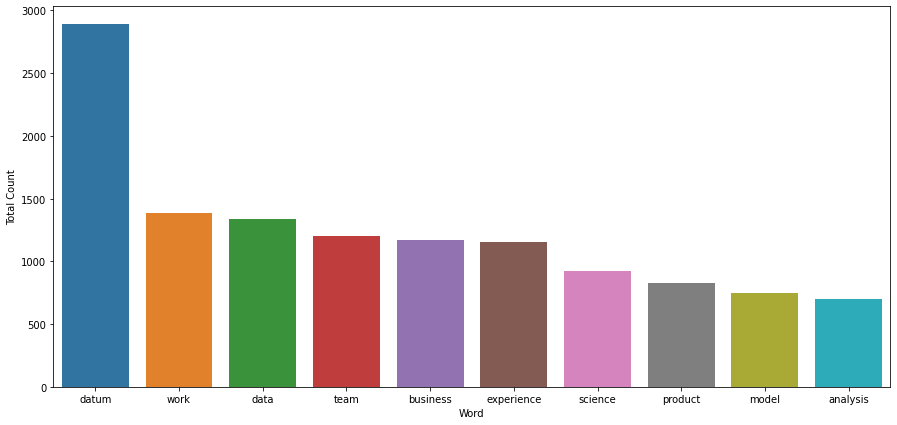

In [14]:
import seaborn as sns
fig, ax = plt.subplots()
sns.barplot(x=wc_sorted['token'][:10], y=wc_sorted['total'][:10])
fig.set_size_inches(15,7)
plt.ylabel('Total Count')
plt.xlabel('Word')

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [15]:
tfidf = TfidfVectorizer(stop_words=spacy.lang.en.stop_words.STOP_WORDS, max_features=5000, tokenizer=tokenize)

dtm = tfidf.fit_transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [16]:
dtm.sample(10)

,+,.about,.no,.perkshealth,.we,/or,1-800-flowers.com,3)experience,3)intermediate,3rd,...,young,youyou,yrs,zeus,zf,zf\xe2\x80\x99s,zillow,|,||,~$70
192,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.099084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,0.037194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.062285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.057770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.031685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [17]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [30]:
nn.kneighbors([dtm.iloc[33].values])

(array([[0.        , 0.        , 1.15492271, 1.18117053, 1.19282364]]),
 array([[ 33, 378, 217, 216,  61]]))

In [41]:
df['description'][217][:200]

'Senior Business Intelligence Data EngineerRocky Hill, CTJob DescriptionOverviewAxians redtoo recently brought its almost 30 years of experience in IT and consulting solutions to the Axians family. As '

In [37]:
df['description'][33][:200]

'Degree in Computer Science, Engineering, Mathematics, or a related field and 7+ years industry experienceExperience in data modeling, ETL development, and data warehousingData Warehousing Experience w'

In [21]:
job_description = ["The Data Analyst will be responsible for overseeing the design, user interface, infrastructure and data reporting analytics for digital campaigns across all Bonneville markets, including our O&O properties and audience extensions. They will also provide data management and ensure all marketing data is extracted from our various vendors and housed for both internal and external use. We are looking for someone who can lead various, ongoing projects to further our data analytics in the digital marketing space."]

In [22]:
new = tfidf.transform(job_description)
nn.kneighbors(new.todense())

(array([[1.21769649, 1.21941106, 1.22811822, 1.24839159, 1.26693429]]),
 array([[230, 414, 280, 289, 326]]))

In [48]:
df['description'][230][:200]

'Spotify is seeking a Data Scientist, Advanced Marketing Analytics to build advanced marketing analytics solutions. You\\xe2\\x80\\x99ll play a key role in expanding Spotify\\xe2\\x80\\x99s marketing measure'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 